# Classificando problemas ortopédicos

Esse dataset contém dados sobre problemas ortopédicos na coluna vertebral, diagnosticados no Centre Médico-Chirurgical de Réadaptation des Massues, em Lyon, France. Contém 6 atributos biomecânicos para 310 entradas **anonimizadas**, sendo **100** de pacientes considerados sem problemas **(Normal - NO)**, **60** de pacientes com **Hérnia de Disco (Disk Hernia - DH)** e **150** de pacientes com Espondilolistese **(Spondylolisthesis - SL)**. 

O dataset está disponível em https://www.openml.org/d/1523


In [36]:
from sklearn.datasets import fetch_openml #importando o open ML
import pandas as pd                       
import matplotlib.pyplot as plt           
import seaborn as sns                    
import numpy as np       
from scipy.io import arff                 

from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier   
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, cohen_kappa_score                      
from sklearn.preprocessing import StandardScaler, MinMaxScaler                             

# Leitura dos dados

In [3]:
dados_path = './phpOkU53r.arff'

dados = arff.loadarff(dados_path)

dados = pd.DataFrame(dados[0])

In [9]:
data = fetch_openml(data_id=1523)
data.target

In [11]:
dados = pd.DataFrame(data=data['data'])

In [12]:
dados

,V1,V2,V3,V4,V5,V6
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985136,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


In [13]:
classes = {'1':'Disk Hernia',
           '2':'Normal',
           '3':'Spondylolisthesis'}

In [14]:
classes['1']

'Disk Hernia'

In [15]:
dados['diagnostic'] = [classes[target] for target in data.target]

In [16]:
dados

,V1,V2,V3,V4,V5,V6,diagnostic
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Disk Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Disk Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985136,-3.530317,Disk Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Disk Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Disk Hernia
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


## Exploração dos dados

In [17]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   V1          310 non-null    float64
 1   V2          310 non-null    float64
 2   V3          310 non-null    float64
 3   V4          310 non-null    float64
 4   V5          310 non-null    float64
 5   V6          310 non-null    float64
 6   diagnostic  310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [19]:
dados.isna().sum()

V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
diagnostic    0
dtype: int64

In [20]:
dados.describe()

,V1,V2,V3,V4,V5,V6
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767933
75%,72.877696,22.120395,63.000000,52.695889,125.467675,41.287352
max,129.834041,49.431864,125.742386,121.429566,163.071041,418.543082


In [23]:
dados.groupby('diagnostic').mean()

,V1,V2,V3,V4,V5,V6
diagnostic,,,,,,
Disk Hernia,47.638407,17.398795,35.463524,30.239612,116.474968,2.480251
Normal,51.685244,12.821414,43.542605,38.863830,123.890834,2.186572
Spondylolisthesis,71.514224,20.748038,64.110108,50.766186,114.518810,51.896687


In [24]:
dados.groupby('diagnostic').describe().T

diagnostic  Disk Hernia      Normal  Spondylolisthesis
V1 count      60.000000  100.000000         150.000000
   mean       47.638407   51.685244          71.514224
   std        10.697131   12.368161          15.109337
   min        26.147921   30.741938          37.903910
   25%        41.018099   42.817849          60.658136
   50%        46.416169   50.123115          72.149306
   75%        53.922329   61.470097          81.075893
   max        74.433593   89.834676         129.834041
V2 count      60.000000  100.000000         150.000000
   mean       17.398795   12.821414          20.748038
   std         7.016708    6.778503          11.506169
   min         3.144669   -5.845994          -6.554948
   25%        12.874329    8.799951          13.461149
   50%        16.949285   13.482435          19.309548
   75%        22.002981   16.785953          29.229680
   max        41.557331   29.894119          49.431864
V3 count      60.000000  100.000000         150.000000
   mean       35.463524   43.542605          64.110108
   std         9.767795   12.361388          16.397068
   min        14.000000   19.071075          24.710274
   25%        29.038069   35.000000          52.000000
   50%        35.164873   42.638923          62.555200
   75%        42.011563   51.602345          76.990924
   max        62.275275   90.563461         125.742386
V4 count      60.000000  100.000000         150.000000
   mean       30.239612   38.863830          50.766186
   std         7.555388    9.624004          12.318813
   min        13.366931   17.386972          19.290046
   25%        25.215274   32.340486          43.166815
   50%        30.000659   37.059694          50.751695
   75%        34.962103   44.608788          56.675435
   max        46.613539   67.195460         121.429566
V5 count      60.000000  100.000000         150.000000
   mean      116.474968  123.890834         114.518810
   std         9.355720    9.014246          15.579995
   min        84.241415  100.501192          70.082575
   25%       112.280320  118.182659         104.706761
   50%       116.696146  123.874329         114.842400
   75%       122.042999  129.040402         123.337307
   max       137.540613  147.894637         163.071041
V6 count      60.000000  100.000000         150.000000
   mean        2.480251    2.186572          51.896687
   std         5.531177    6.307483          40.108030
   min       -10.675871  -11.058179           1.010041
   25%        -0.910818   -1.511360          30.393271
   50%         2.542441    1.152710          42.372509
   75%         6.059666    4.968807          61.894425
   max        15.779697   31.172767         418.543082

Ao que parece há um outlier na variável V6

## Tratando outlier

<AxesSubplot:xlabel='V6', ylabel='Count'>

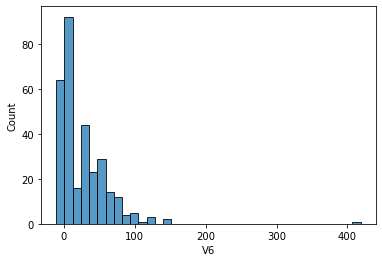

In [25]:
sns.histplot(data=dados, x='V6')

In [28]:
dados.drop(dados.loc[dados.V6 > 400].index, inplace=True)

<AxesSubplot:xlabel='V6', ylabel='Count'>

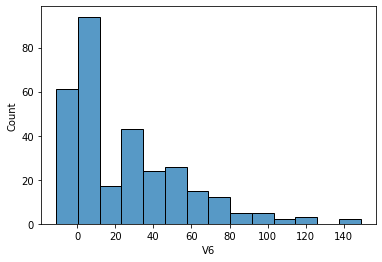

In [29]:
sns.histplot(data=dados, x='V6')

# Pré-processamento da base

In [30]:
x = dados.drop(columns=['diagnostic'])
y = dados['diagnostic']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=42) 

In [32]:
x_train

,V1,V2,V3,V4,V5,V6
264,54.503685,6.819910,47.000000,47.683775,111.791172,-4.406769
116,70.484104,12.489488,62.417142,57.994617,114.190049,56.902448
64,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972
60,74.377678,32.053104,78.772013,42.324573,143.560691,56.125906
279,48.801909,18.017762,52.000000,30.784147,139.150407,10.442862
...,...,...,...,...,...,...
249,50.753290,20.235060,37.000000,30.518231,122.343516,2.288488
112,42.021386,-6.554948,67.900000,48.576334,111.585782,27.338671
269,37.140150,16.481240,24.000000,20.658910,125.014361,7.366425
137,83.396606,34.310989,78.423293,49.085617,110.466516,49.672096


Base de dados requer escalonamento/normalização

In [33]:
scaler = MinMaxScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [34]:
x_train_scaled

array([[0.30822577, 0.23889301, 0.29532213, 0.51737922, 0.44853517,
        0.04162024],
       [0.48193214, 0.34015932, 0.43329254, 0.67283102, 0.47433274,
        0.42525388],
       [0.54348985, 0.50889009, 0.61714721, 0.61578758, 0.579098  ,
        0.13447154],
       ...,
       [0.11948499, 0.4114574 , 0.08949156, 0.1099378 , 0.59073763,
        0.11528932],
       [0.62229041, 0.72992077, 0.57653407, 0.53851414, 0.43428979,
        0.38001099],
       [0.65878086, 0.76085711, 0.49418172, 0.56301315, 0.74559708,
        0.76289043]])

# Criação modelos

## KNN

In [35]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

In [37]:
print(accuracy_score(y_test, y_pred_knn))

0.8333333333333334


In [39]:
from sklearn.metrics import ConfusionMatrixDisplay

<Figure size 1080x720 with 0 Axes>

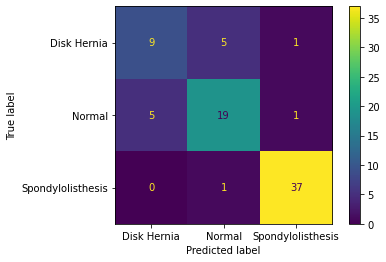

In [41]:
conf_matrix = confusion_matrix(y_test, y_pred_knn, labels=['Disk Hernia','Normal','Spondylolisthesis'])

plt.figure(figsize=(15,10))

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Disk Hernia','Normal','Spondylolisthesis'])

disp.plot(values_format='d')

plt.show()

In [42]:
print(classification_report(y_test, y_pred_knn))

                   precision    recall  f1-score   support

      Disk Hernia       0.64      0.60      0.62        15
           Normal       0.76      0.76      0.76        25
Spondylolisthesis       0.95      0.97      0.96        38

         accuracy                           0.83        78
        macro avg       0.78      0.78      0.78        78
     weighted avg       0.83      0.83      0.83        78

